### images and properties and working with borders
- Access pixel values and modify them
    - we can access a pixel by using row and column coordinates
        - it will give out as 3 values in form of (blue,green,red)
    - We can modify pixel as the same by giving (blue,green,red) values
  
- Image properties
    - shape
    - dtype
    - size
    - resize

- Extracting region of image (ROI)
- Splitting and merging image channerls
    - we have 3 channels
        - Blue,Green,Red
            - cv2.split(img)
         - It is time taking process
    - We can also merge those channels by using 
        - cv2.merge(b,g,r)
- Accessing colors without splitting and change those color values
- Border for images
    - Arguments required are
        - input image
        - Top, Bottom, Left, Right
        - Border Type
        - value - Color of border if border type is cv2.BORDER_CONSTANT
    - Border Types
        - cv2.BORDER_CONSTANT - Adds a constant colored border. The value should be given as next argument.
        - cv2.BORDER_REFLECT - Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
        - cv2.BORDER_REFLECT_101 or cv2.BORDER_DEFAULT - Same as above, but with a slight change, like this :                  gfedcb|abcdefgh|gfedcba
        - cv2.BORDER_REPLICATE - Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
        - cv2.BORDER_WRAP - Can’t explain, it will look like this : cdefgh|abcdefgh|abcdefg




In [8]:
#Access pixel values and modify them

import cv2
import numpy as np
img=cv2.imread("standard_test_images\\standard_test_images\\1.tiff")
pixel=img[50,50]         # To access a (50,50) pixel value ..(Color value it will print)
cv2.imshow("img1",img)
print(pixel)

img[50,50]=[255,255,255]
print(img[50,50])
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[121 115 123]
[255 255 255]


In [11]:
# accessing RED value

import cv2
import numpy as np
img=cv2.imread("standard_test_images\\standard_test_images\\1.tiff")

red=img.item(100,100,2)
print(red)
# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)


138


100

In [8]:
# Image properties

import cv2
import numpy as np
img=cv2.imread("standard_test_images\\standard_test_images\\1.tiff")
print("Image shape is ",img.shape)
print("Image size is ",img.size)

print("Image datatype is ",img.dtype)
img=cv2.resize(img,(200,200))
print("Image size afteer changing it's size ",img.size)

Image shape is  (256, 256, 3)
Image size is  196608
Image datatype is  uint8
Image size afteer changing it's size  120000


In [3]:
# Extracting ROI (region of image)

import cv2
import numpy as np
img=cv2.imread("standard_test_images\\standard_test_images\\1.tiff")

ROI=img[10:100 ,100:200]
img[0:90 , 10:110]=ROI
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
# Image splitting and merging
import cv2
import numpy as np
img=cv2.imread("standard_test_images\\standard_test_images\\1.tiff")
cv2.imshow("img",img)
b,g,r=cv2.split(img)
print(b)
print(g)
img=cv2.merge((g,b,r))
cv2.imshow("img_merge",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[115 103 104 ... 232 228 236]
 [123 101 104 ... 233 226 239]
 [115 104 103 ... 232 227 235]
 ...
 [178 103  98 ... 235 222 243]
 [180 101 101 ... 237 223 243]
 [  0   0   9 ... 143 143 143]]
[[  0  61  60 ... 254 254 237]
 [  0  62  63 ... 254 254 240]
 [  0  60  57 ... 253 254 237]
 ...
 [  0  69  66 ... 248 254 248]
 [  0  66  67 ... 250 254 249]
 [197 199 199 ...  80  79  70]]


In [21]:
# Accessing 3 colors without splitting image and change the color values 
import cv2
import numpy as np

img=cv2.imread("standard_test_images\\standard_test_images\\1.tiff")
# Accessing blue values
b=img[:,:,0]
cv2.imshow("img",img)
# We can directly accees colors without splitting like this 0 -> blue  1 -> Green 2 -> Red
# Accessign all red values and replce with 0 directly
img[:,:,2]=0
print(b)
cv2.imshow("red_values_are_zero",img)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[115 103 104 ... 232 228 236]
 [123 101 104 ... 233 226 239]
 [115 104 103 ... 232 227 235]
 ...
 [178 103  98 ... 235 222 243]
 [180 101 101 ... 237 223 243]
 [  0   0   9 ... 143 143 143]]


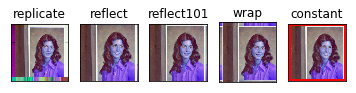

In [35]:
# Working with borders

import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread("standard_test_images\\standard_test_images\\1.tiff")

replicate = cv2.copyMakeBorder(img1,20,20,20,20,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,5,10,5,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,20,10,20,0,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,15,10,15,10,cv2.BORDER_CONSTANT,value=BLUE)
names=[replicate,reflect,reflect101,wrap,constant]
titles=['replicate','reflect','reflect101','wrap','constant']
for i in range(0,len(names),1):
    plt.subplot(2,5,i+1)
    plt.imshow(names[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
    cv2.imshow(titles[i],names[i])
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()